In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [26]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
### 데이터 전처리
X_train = X_train.reshape(-1,28,28,1)/255 # 0~1 사이의 값으로 정규화
X_test = X_test.reshape(-1,28,28,1)/255
X_train.shape, X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [29]:
# model = keras.models.Sequential() # relu : 음수는 0으로 바꾸는 것
# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2))) # kernal_size : 필터 크기 filters : 필터 개수
# model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2))) # pool_size(2,2): 2*2 크기 격자로 자름, 전체 크기는 절반으로 줄어듬
# model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(keras.layers.Flatten()) # 3 차원 데이터를 1차원 데이터로 풀어버림
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))



model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same',
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 60)        16260     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 120)         64920     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 120)       

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [33]:

history = model.fit(X_train, y_train, epochs=20, batch_size = 100, validation_split=0.25)


Epoch 1/20
450/450 [==============================] - 20s 45ms/step - loss: 0.0482 - acc: 0.9849 - val_loss: 0.0426 - val_acc: 0.9869
Epoch 2/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0331 - acc: 0.9906 - val_loss: 0.0435 - val_acc: 0.9865
Epoch 3/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0250 - acc: 0.9920 - val_loss: 0.0396 - val_acc: 0.9888
Epoch 4/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0366 - val_acc: 0.9892
Epoch 5/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0410 - val_acc: 0.9872
Epoch 6/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0377 - val_acc: 0.9903
Epoch 7/20
450/450 [==============================] - 20s 44ms/step - loss: 0.0126 - acc: 0.9957 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 8/20
450/450 [==============================] - 20s 44ms

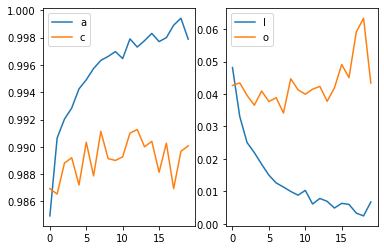

In [36]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend('acc, val_acc')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend('loss, val_loss')

In [37]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [38]:
np.where(y_pred.argmax(axis = 1) != y_test.argmax(axis= 1))

(array([ 115,  149,  326,  340,  412,  445,  625,  674,  726,  740,  947,
        1014, 1044, 1182, 1242, 1299, 1319, 1331, 1393, 1459, 1559, 1709,
        1737, 1878, 1901, 1924, 1999, 2035, 2118, 2129, 2130, 2135, 2182,
        2266, 2329, 2369, 2447, 2462, 2597, 2654, 2771, 2896, 2927, 2939,
        2970, 3023, 3225, 3422, 3451, 3520, 3558, 3597, 3727, 3762, 3767,
        3808, 4176, 4238, 4271, 4284, 4360, 4443, 4536, 4571, 4575, 4731,
        4761, 4783, 4814, 4823, 4860, 4911, 5165, 5201, 5450, 5654, 5752,
        5937, 5955, 5981, 5982, 5997, 6042, 6571, 6576, 6597, 6625, 6651,
        6783, 6981, 8059, 8382, 8520, 8527, 9009, 9015, 9642, 9664, 9679,
        9692, 9729, 9922], dtype=int64),)

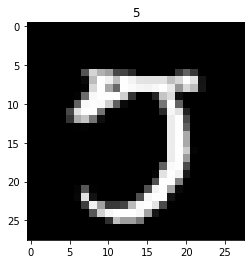

In [57]:
n = 1299
plt.title(np.argmax(y_test[n]))
plt.imshow(X_test[n,:,:,0], cmap= 'gray')